1. Go to http://freesound.org and download a sound sample that includes music, speech, or other sounds that have a well-defined pitch. Select a roughly half-second segment where the pitch is constant. Compute and plot the spectrum of the segment you selected. What connection can you make between the timbre of the sound and the harmonic structure you see in the spectrum?

Use high_pass, low_pass, and band_stop to filter out some of the harmonics. Then convert the spectrum back to a wave and listen to it. How does the sound relate to the changes you made in the spectrum?

去http://freesound.org 下載聲音樣本包括音樂，語音或其他音調明確的聲音。選擇一個大約半秒的音高恆定的片段。計算並繪製所選段的光譜。 可以在聲音的音色和頻譜中看到的諧波結構之間建立什麼聯繫？

使用high_pass，low_pass和band_stop過濾掉一些諧波。然後將頻譜轉換回一波並聽一聽。聲音與您在頻譜中所做的更改有何關係？

In [55]:
from thinkdsp import read_wave

wave = read_wave('170255__dublie__trumpet.wav')
wave.normalize()
wave.make_audio()

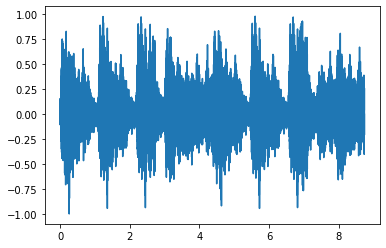

In [56]:
wave.plot()

選擇一個大約半秒的音高恆定的片段。
從1.1秒開始，持續0.5秒。

In [57]:
segment = wave.segment(start=1.1, duration=0.5)
segment.make_audio()

繪製所選段的光譜，x軸為time(s)。

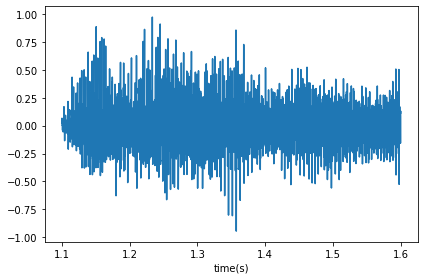

In [58]:
from thinkdsp import decorate
segment.plot()
decorate(xlabel='time(s)')

畫頻譜，x軸設定到8000。

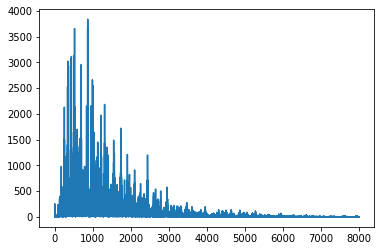

In [59]:
spectrum = wave.make_spectrum()
spectrum.plot(high=8000)

高於2000頻率的成份會被抑制，也就是頻率高於2000的成份，就依照某個比例把振幅縮小。

In [60]:
spectrum.low_pass(cutoff=8000)
spectrum.make_wave().make_audio()

抑制1000頻率的以下的成份

In [61]:
spectrum.high_pass(cutoff=1000)
spectrum.make_wave().make_audio()

band_stop，帶阻濾波器，在1000~3000頻率之間的成份要被抑制。

In [62]:
spectrum.band_stop(low_cutoff=1000,high_cutoff=3000)
spectrum.make_wave().make_audio()

filter_wave是從wave中選擇一個片段並對其進行過濾。
繪製頻譜並顯示音頻。
wave:物件的wave。
start:開始時間。
duration:持續時間。
cutoff:高於或低於多少頻率並抑制。

In [63]:
from IPython.display import display

def filter_wave(wave, start, duration, cutoff):
    
    segment = wave.segment(start, duration)
    spectrum = segment.make_spectrum()

    spectrum.plot(high=5000, color='blue')
    spectrum.low_pass(cutoff) #頻率高於cutoff，會被抑制
    spectrum.plot(high=5000, color='red')
    decorate(xlabel='Frequency (Hz)') #x軸為Frequency (Hz)
    
    audio = spectrum.make_wave().make_audio() #製造聲音
    display(audio) #顯示聲音

藍色為原本的spectrum，紅色為被抑制後的spectrum。

In [64]:
from ipywidgets import interact, fixed

interact(filter_wave, wave=fixed(wave), 
         start=(0, 5, 0.1), duration=(0, 5, 0.1), cutoff=(0, 5000, 100));

interactive(children=(FloatSlider(value=2.0, description='start', max=5.0), FloatSlider(value=2.0, description…